In [1]:
import os
import requests 
import time
import string
import networkx as nx
import itertools
import networkx as nx
import pandas as pd
import json
import re
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

from nltk.corpus import wordnet as wn #importing it
from nltk.stem.wordnet import WordNetLemmatizer #importing wordnet lemmatizer
from nltk import pos_tag #part-of-speech-tagger
from collections import defaultdict #defaultdict returns default value for non-existant keys you try to  access based on the function you passed in the constructor
#from google.colab import files

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ftrole/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# creation file all_tweets

In [2]:
china= pd.read_csv("../../data/covid_coronavirus_vaccine_aggregration/4.countries/China.csv",dtype ={"id_str": str})
america = pd.read_csv("../../data/covid_coronavirus_vaccine_aggregration/4.countries/USA.csv",dtype ={"id_str": str})

In [3]:
import json
import re
'''

def extract_text(df):     # extract the text from the tweets
    list_strings = []
    i=0
    for index in range(len(df)):
        string = (df.loc[index]['extended_tweet'])
    
        if type(string) == str :
            if re.search(':(.+?)https',string):
                ss = re.search(':(.+?)https',string).group(1)
            list_strings.append(ss)

        else:

            list_strings.append(df.loc[index]['text'])
        i=i+1

    return list_strings
'''


def extract_text(df):       #extract the text from the tweets and RT
                            #works ONLY on .csv file
    list_strings = []
    for index in range(len(df)):
        #print(index)
        text = df.loc[index]['text']                          #if it is nor trucated nor a RT  i take "text"
        string = -1
        if (df.loc[index,"truncated"] == True):                 #if it is trucated I take "extended_tweet"
            string = df.loc[index,"extended_tweet"]
        if type(df.loc[index,"retweeted_status"]) != float:     #if it is a RT I take retweeted_status
            string = df.loc[index,"retweeted_status"]
        if type(string) == str :
            if(re.search('full_text\':(.+?)https',string) != None):     #if I find "full_text"
                s = re.search('full_text\':(.+?)https',string).group(1)
            if(re.search('text\':(.+?)https',string)!= None):
                s = re.search('text\':(.+?)https',string).group(1)
            else:  #here then one should remove the http
                if (re.search('full_text\':\s\'(.+?)\'',string)!=None) :
                    s=re.search('full_text\':\s\'(.+?)\'',string).group(1)  
                if (re.search('\{\\\'full_text\\\':\s(.+?)\"',string)!=None) : 
                    re.search('\{\\\'full_text\\\':\s(.+?)\"',string).group(1)
            
            list_strings.append(s)
            #print(s)         
        else:
            list_strings.append(text)
            print(text)
      

    return list_strings

In [4]:
china_text = extract_text(china)

#China's imports, exports, foreign capital affected by coronavirus outbreak #COVID19  https://t.co/28s60RsUkJ
Live: China's State Council Information Office briefs media on implementation of #COVID19 prevention #coronavirus https://t.co/wprm7VqHwg
Hong Kong police officer tested positive of novel #coronavirus https://t.co/0eRuwb7e9Y
U.S. researchers map 3D structure of novel #coronavirus' key protein https://t.co/aym2bKnSQl
London volunteers to take over #Tokyo2020 Olympics due to #coronavirus fears https://t.co/n1mPBI6blB
Live: CGTN reporter Li Jingjing visits the makeshift hospital in Wuhan Sports Center #coronavirus #COVID19 https://t.co/m1erJVRMjR
Live: All 32 inpatient wards of Wuhan's Leishenshan Hospital go into operation #COVID19 #coronavirus https://t.co/M9DS8z1Ro1
Classmates reunite on front line of #coronavirus battle after 15 years https://t.co/YlYFO10CXQ
Hungarian students cheer for China in #coronavirus fight https://t.co/ASJUx3EMFu
China to cut $71.3 bln insurance fees t

In [5]:
len(china_text)

5080

In [6]:
china["extended"] = china_text

In [7]:
USA_text = extract_text(america)

Coronavirus brings out anti-Chinese sentiment in South Korea https://t.co/W1bvPBzJcM
#Coronavirus claims two more lives in Iran https://t.co/0C37OT8UUA https://t.co/Rz87UHGlyv
What happens if you catch the new #coronavirus? https://t.co/NgljjqTfBb | #COVID2019 https://t.co/4xb6rjMKDz
When will a #coronavirus vaccine be available? https://t.co/dE0EVaOFU0 https://t.co/YMmEI0FJSH
First case of #coronavirus confirmed in Lebanon https://t.co/jcJtyTCVp7 https://t.co/QSn9XKYdN0
6 #coronavirus cases discovered in north Italy, hundreds to be tested https://t.co/qJq4tqOVjW https://t.co/vaqcQN6F18
South Korea's confirmed coronavirus cases rise to 204.

Read the latest on #COVID19: https://t.co/NOnloisORZ https://t.co/jszVNibMed
China coronavirus outbreak: All the latest updates https://t.co/MBfhIxP4a8
China expels foreign journalists as coronavirus deaths climb https://t.co/HXvN75BwhQ
China coronavirus outbreak: All the latest updates https://t.co/CDeMn5xL4M
Two die of coronavirus in Iran, first 

In [8]:
USA_text[7]

' "\'Shameful\'\\n\\nUkrainians attack a bus carrying 70 evacuees from China over the coronavirus outbreak '

In [9]:
america["extended"] = USA_text
all_tweets = america.append( china)
all_tweets

created_at                   id  \
0     Fri Feb 21 21:15:38 +0000 2020  1230964318633701376   
1     Fri Feb 21 20:15:04 +0000 2020  1230949076843278337   
2     Fri Feb 21 19:15:00 +0000 2020  1230933959619436544   
3     Fri Feb 21 18:31:00 +0000 2020  1230922886442930177   
4     Fri Feb 21 17:15:00 +0000 2020  1230903761012436993   
...                              ...                  ...   
5075  Wed Mar 17 12:23:13 +0000 2021  1372161599176200198   
5076  Wed Mar 17 12:10:57 +0000 2021  1372158510683725824   
5077  Wed Mar 17 11:30:31 +0000 2021  1372148338842169346   
5078  Wed Mar 17 06:55:35 +0000 2021  1372079148584169481   
5079  Wed Mar 17 05:56:40 +0000 2021  1372064322671669248   

                   id_str                                               text  \
0     1230964318633701376  Coronavirus brings out anti-Chinese sentiment ...   
1     1230949076843278337  "The coronavirus issue could not have come at ...   
2     1230933959619436544  #Coronavirus claims two more lives in Iran htt...   
3     1230922886442930177  What happens if you catch the new #coronavirus...   
4     1230903761012436993  When will a #coronavirus vaccine be available?...   
...                   ...                                                ...   
5075  1372161599176200198  China has approved the emergency use of a self...   
5076  1372158510683725824  As Fawziya Abikar Nur, Minister of Health and ...   
5077  1372148338842169346  Another Chinese #COVID19 vaccine obtained emer...   
5078  1372079148584169481  LIVE: Pakistan begins vaccinating its citizens...   
5079  1372064322671669248  #HeadlinesWatch: SCMP https://t.co/J15SRgQ5HM\...   

                                                 source  truncated  \
0     <a href="https://trueanthem.com/" rel="nofollo...      False   
1     <a href="http://www.socialflow.com" rel="nofol...       True   
2     <a href="https://about.twitter.com/products/tw...      False   
3     <a href="https://about.twitter.com/products/tw...      False   
4     <a href="https://about.twitter.com/products/tw...      False   
...                                                 ...        ...   
5075  <a href="http://static.cms.xinhua-news.cn/sm/t...       True   
5076  <a href="http://static.cms.xinhua-news.cn/sm/t...       True   
5077  <a href="http://static.cms.xinhua-news.cn/sm/t...       True   
5078  <a href="https://periscope.tv" rel="nofollow">...       True   
5079  <a href="http://static.cms.xinhua-news.cn/sm/t...       True   

      in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  \
0                       NaN                        NaN                  NaN   
1                       NaN                        NaN                  NaN   
2              1.230923e+18               1.230923e+18            4970411.0   
3              1.230904e+18               1.230904e+18            4970411.0   
4              1.230892e+18               1.230892e+18            4970411.0   
...                     ...                        ...                  ...   
5075                    NaN                        NaN                  NaN   
5076                    NaN                        NaN                  NaN   
5077                    NaN                        NaN                  NaN   
5078                    NaN                        NaN                  NaN   
5079                    NaN                        NaN                  NaN   

      in_reply_to_user_id_str  ...  \
0                         NaN  ...   
1                         NaN  ...   
2                   4970411.0  ...   
3                   4970411.0  ...   
4                   4970411.0  ...   
...                       ...  ...   
5075                      NaN  ...   
5076                      NaN  ...   
5077                      NaN  ...   
5078                      NaN  ...   
5079                      NaN  ...   

                                      extended_entities retweeted_status  \
0        

In [10]:
all_tweets.drop_duplicates(subset='id',inplace=True)
all_tweets

created_at                   id  \
0     Fri Feb 21 21:15:38 +0000 2020  1230964318633701376   
1     Fri Feb 21 20:15:04 +0000 2020  1230949076843278337   
2     Fri Feb 21 19:15:00 +0000 2020  1230933959619436544   
3     Fri Feb 21 18:31:00 +0000 2020  1230922886442930177   
4     Fri Feb 21 17:15:00 +0000 2020  1230903761012436993   
...                              ...                  ...   
5070  Thu Mar 18 11:50:51 +0000 2021  1372515843955851264   
5071  Thu Mar 18 11:01:40 +0000 2021  1372503462601129991   
5076  Wed Mar 17 12:10:57 +0000 2021  1372158510683725824   
5077  Wed Mar 17 11:30:31 +0000 2021  1372148338842169346   
5079  Wed Mar 17 05:56:40 +0000 2021  1372064322671669248   

                   id_str                                               text  \
0     1230964318633701376  Coronavirus brings out anti-Chinese sentiment ...   
1     1230949076843278337  "The coronavirus issue could not have come at ...   
2     1230933959619436544  #Coronavirus claims two more lives in Iran htt...   
3     1230922886442930177  What happens if you catch the new #coronavirus...   
4     1230903761012436993  When will a #coronavirus vaccine be available?...   
...                   ...                                                ...   
5070  1372515843955851264  Tap https://t.co/aSutOvQ62X for Asia-Pacific #...   
5071  1372503462601129991  Namibia will launch its #COVID19 vaccination c...   
5076  1372158510683725824  As Fawziya Abikar Nur, Minister of Health and ...   
5077  1372148338842169346  Another Chinese #COVID19 vaccine obtained emer...   
5079  1372064322671669248  #HeadlinesWatch: SCMP https://t.co/J15SRgQ5HM\...   

                                                 source  truncated  \
0     <a href="https://trueanthem.com/" rel="nofollo...      False   
1     <a href="http://www.socialflow.com" rel="nofol...       True   
2     <a href="https://about.twitter.com/products/tw...      False   
3     <a href="https://about.twitter.com/products/tw...      False   
4     <a href="https://about.twitter.com/products/tw...      False   
...                                                 ...        ...   
5070  <a href="http://static.cms.xinhua-news.cn/sm/t...       True   
5071  <a href="http://static.cms.xinhua-news.cn/sm/t...       True   
5076  <a href="http://static.cms.xinhua-news.cn/sm/t...       True   
5077  <a href="http://static.cms.xinhua-news.cn/sm/t...       True   
5079  <a href="http://static.cms.xinhua-news.cn/sm/t...       True   

      in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  \
0                       NaN                        NaN                  NaN   
1                       NaN                        NaN                  NaN   
2              1.230923e+18               1.230923e+18            4970411.0   
3              1.230904e+18               1.230904e+18            4970411.0   
4              1.230892e+18               1.230892e+18            4970411.0   
...                     ...                        ...                  ...   
5070                    NaN                        NaN                  NaN   
5071                    NaN                        NaN                  NaN   
5076                    NaN                        NaN                  NaN   
5077                    NaN                        NaN                  NaN   
5079                    NaN                        NaN                  NaN   

      in_reply_to_user_id_str  ...  \
0                         NaN  ...   
1                         NaN  ...   
2                   4970411.0  ...   
3                   4970411.0  ...   
4                   4970411.0  ...   
...                       ...  ...   
5070                      NaN  ...   
5071                      NaN  ...   
5076                      NaN  ...   
5077                      NaN  ...   
5079                      NaN  ...   

                                      extended_entities retweeted_status  \
0        

In [11]:
 #select id_str and texts and save
import csv
all_tweets=all_tweets[['id_str','extended']]
#all_tweets.to_csv('../LIWK_files/all_tweets.csv',index=False, quoting=csv.QUOTE_NONNUMERIC) # here the quoting is to avoid index approximation

# division per country and periods

In [12]:
## start by dividing the liwk files by country and time periods.

#read files
pdLIWK = pd.read_excel('../../LIWK_files/LIWC2015 Results (all_tweets).xlsx', engine='openpyxl',dtype ={"Source (A)": str})
pd_indexes= pd.read_csv('../../LIWK_files/all_tweets.csv',dtype ={"id_str": str})

china1= pd.read_csv("../../data/covid_coronavirus_vaccine_aggregration/3.countries+periods/China_JanFeb2020.csv",dtype ={"id_str": str})
china2 = pd.read_csv("../../data/covid_coronavirus_vaccine_aggregration/3.countries+periods/China_SeptOct2020.csv",dtype ={"id_str": str})
china3= pd.read_csv("../../data/covid_coronavirus_vaccine_aggregration/3.countries+periods/China_MarchApril2021.csv",dtype ={"id_str": str})

america1= pd.read_csv("../../data/covid_coronavirus_vaccine_aggregration/3.countries+periods/USA_JanFeb2020.csv",dtype ={"id_str": str})
america2 = pd.read_csv("../../data/covid_coronavirus_vaccine_aggregration/3.countries+periods/USA_SeptOct2020.csv",dtype ={"id_str": str})
america3= pd.read_csv("../../data/covid_coronavirus_vaccine_aggregration/3.countries+periods/USA_MarchApril2021.csv",dtype ={"id_str": str})

#pdLIWK.to_csv("../LIWK_files/LIWK_results_full.csv")  #save to csv

#pdLIWK["Source (A)"] = [ pdLIWK["Source (A)"][i][:-5] for i in range(len(pdLIWK))]

/home/ftrole/anaconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


The indexes of the tweets are distorted in the excel file, so I change it back with the original one :

In [13]:
#get index of the tweets 
print(pdLIWK[["Source (A)","Source (B)"]][0:10])
print(pd_indexes[["id_str","extended"]][0:10])
pdLIWK["Source (A)"] = pd_indexes["id_str"]
#pdLIWK[pdLIWK["Source (A)"].isin(america["id_str"])] 


            Source (A)                                         Source (B)
0  1230806996087160060   "'Shameful'\n\nUkrainians attack a bus carryi...
1  1230735700745530110  RT @AJENews: China's Hubei says 220 people fro...
2  1230647176990249980  China coronavirus outbreak: All the latest upd...
3  1230375401874160130  China expels foreign journalists as coronaviru...
4  1230292370027160060  China coronavirus outbreak: All the latest upd...
5  1230164648009309950   'At least 2,004 people in mainland China have...
6  1230136882861949950  RT @AJENews: UN AIDS agency warns that HIV pat...
7  1230056202807180030   'China revokes press credentials of three at ...
8  1230054445251160060   'As of February 19, there were at least 14,00...
9  1230046864700950020   "There's concern over China's mass surveillan...
                id_str                                           extended
0  1230806996087169024   "'Shameful'\n\nUkrainians attack a bus carryi...
1  1230735700745539590  RT @AJENews: C

In [14]:
print("china unique tweets",len(np.unique(china["id_str"]) ) )
print("america unique tweets",len(np.unique(america["id_str"]) ) )

print("america 1 period",len(np.unique(america1["id_str"])))
print("america 2 period",len(np.unique(america2["id_str"])))
print("america 3 period",len(np.unique(america3["id_str"])))

print("china 1 period",len(np.unique(china1["id_str"])))
print("china 2 period",len(np.unique(china2["id_str"])))
print("china 3 period",len(np.unique(china3["id_str"])))

china unique tweets 4637
america unique tweets 11911
america 1 period 3156
america 2 period 5527
america 3 period 3228
china 1 period 2398
china 2 period 1119
china 3 period 1120


## save the sub df of the result in new files

In [15]:

america1L=pdLIWK[pdLIWK["Source (A)"].isin(america1["id_str"])] 
america2L=pdLIWK[pdLIWK["Source (A)"].isin(america2["id_str"])] 
america3L=pdLIWK[pdLIWK["Source (A)"].isin(america3["id_str"])] 

americaTL=pdLIWK[pdLIWK["Source (A)"].isin(america["id_str"])] 

china1L=pdLIWK[pdLIWK["Source (A)"].isin(china1["id_str"])] 
china2L=pdLIWK[pdLIWK["Source (A)"].isin(china2["id_str"])] 
china3L=pdLIWK[pdLIWK["Source (A)"].isin(china3["id_str"])] 

chinaTL=pdLIWK[pdLIWK["Source (A)"].isin(china["id_str"])] 
'''
path="../LIWK_files/"

america1L.to_csv(path+'USA_JanFeb2020L.csv',index=False)
america2L.to_csv(path+'USA_SeptOct2020L.csv',index=False)
america3L.to_csv(path+'USA_MarchApril2021L.csv',index=False)

americaTL.to_csv(path+'USAL.csv',index=False)


china1L.to_csv(path+'China_JanFeb2020L.csv',index=False)
china2L.to_csv(path+'China_SeptOct2020L.csv',index=False)
china3L.to_csv(path+'China_MarchApril2021L.csv',index=False)

chinaTL.to_csv(path+'ChinaL.csv',index=False)
'''

'\npath="../LIWK_files/"\n\namerica1L.to_csv(path+\'USA_JanFeb2020L.csv\',index=False)\namerica2L.to_csv(path+\'USA_SeptOct2020L.csv\',index=False)\namerica3L.to_csv(path+\'USA_MarchApril2021L.csv\',index=False)\n\namericaTL.to_csv(path+\'USAL.csv\',index=False)\n\n\nchina1L.to_csv(path+\'China_JanFeb2020L.csv\',index=False)\nchina2L.to_csv(path+\'China_SeptOct2020L.csv\',index=False)\nchina3L.to_csv(path+\'China_MarchApril2021L.csv\',index=False)\n\nchinaTL.to_csv(path+\'ChinaL.csv\',index=False)\n'

## Dummy projections---(actually no projectio!!) (simple average and sum)

In [16]:
from wordcloud import WordCloud
def plot_wordcloud(dictionary):
    wordcloud = WordCloud(background_color='white',
                          width=1500,
                          height=1000
                          ).generate_from_frequencies(dictionary)
    # use .generate(space_separated_string) - to generate cloud from text

    plt.figure(figsize=(9,6))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [17]:
# functions from NS_word_meas
def cleaner(tweet,word_list = stopwords.words('english')):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) # remove mentions
    tweet = re.sub("#[A-Za-z0-9]+", "",tweet) # remove hashtags
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) # remove http links
    tweet = " ".join(tweet.split())
    tweet = str.lower(tweet) #to lowercase
    table = str.maketrans(dict.fromkeys(string.punctuation)) 
    tweet = tweet.translate(table)# remove punctuation

    special_characters = ['rt','dr','“','rt','the','to','of','a','an','on','has','have','had','is','was','did','n','et','ha','lt','1','2','5']

    tweet = tweet.split()      
    tweet = ' '.join([ word for word in tweet if word not in word_list and word not in special_characters  ])   #remove useless words
    return tweet



#initialize an empty dict

def frequency_marker_dictionary(df,df2,markstring):   ##dummy marker assignment
    mark_words = {}
    count_words = {}
    i=0
    for row in df:
        for word in row.split():
            #if the word is encountered for the first time add to dict as key and set its value to 0
            mark_words.setdefault(word, 0)
            count_words.setdefault(word, 0)
            #increase the value of a word by the average of the previous values and the new one tweet value
            mark_words[word] = mark_words[word] + df2.iloc[i][markstring]  
            count_words[word] += 1
        i+=1
    return mark_words, count_words

In [18]:
# this is the code provided by Lejla for cleaning, lemmatising and pos tagging tweets

nltk.download('words')
words = set(nltk.corpus.words.words()) #the last two lines serve to download the corpus of standard English language words
nltk.download('stopwords') #downloading stopwords
stop_words = set(nltk.corpus.stopwords.words("english")) #taking the stop words from English language
nltk.download('wordnet') #downloading wordnet
from nltk.corpus import wordnet as wn #importing it
from nltk.stem.wordnet import WordNetLemmatizer #importing wordnet lemmatizer
from nltk import pos_tag #part-of-speech-tagger
nltk.download('averaged_perceptron_tagger') #downloading tagger
from collections import defaultdict #defaultdict returns default value for non-existant keys you try to  access based on the function you passed in the constructor
tag_map = defaultdict(lambda : wn.NOUN) #here we define that wn.NOUN is the default value for the dict
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

def lemma_pos_cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) # remove mentions
    tweet = re.sub("#[A-Za-z0-9]+", "",tweet) # remove hashtags
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) # remove http links
    tweet = " ".join(tweet.split())
    tweet = str.lower(tweet) #to lowercase
    tweet = re.sub("'", " ", tweet)  # remove aphostrophe

    #basically we use pos_tag function on tokens that we get by applying wordpunct tokenization
    #to tweet (it separates all the words and symbols)
    #then we pass the token along with it's wordnet pos value that we get from the tag_map dictionary (noun, adjective, verb or adverb) to the lemma function (the WordNetLemmatizer())
    lemma_function = WordNetLemmatizer()
    tweet = " ".join(lemma_function.lemmatize(token, tag_map[tag[0]]) for token, tag in nltk.pos_tag(nltk.wordpunct_tokenize(tweet))) #lemmatize

    # francesco: I removed also all 2 letters words and added specific words, words that appears frequently but are discarded because they are not in the english language and len(w)>2
    specific_words=['virus', 'coronavirus', 'covid19', 'covid', 'trump', 'hubei', 'beijing', 'xinjiang', 'jinping', 'korea', 'xinhua', 'india', 'taiwan','johnson','singapore', 'africa', 'japanese', 'france', 'asian', 'australia', 'french', 'asia', 'leishenshan', 'british', 'qingdao', 'fauci', 'america',  'california', 'sichuan', 'malaysia', 'huawei','thailand', 'shandong', 'italy', 'philippines', 'germany', 'facebook', 'african', 'shenzhen', 'tokyo', 'russian','uygur', '5g', 'pompeo', 'vietnam', 'australian', 'cambodia', 'zhejiang', 'yunnan', 'guangdong', 'korean', 'iran', 'washington']
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) if (w in words or w in specific_words) and w not in stop_words ) #remove stop words
   
    return tweet

[nltk_data] Downloading package words to /home/ftrole/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ftrole/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ftrole/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ftrole/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [19]:
## Adjacency matrix building
def adj_matrix(freq_dict,cleaned_df_text):   

    words = sorted(list(freq_dict.keys()))

    A = pd.DataFrame(np.zeros((len(words),len(words))), columns = words, index = words )

    for phrase in cleaned_df_text:

        words_list = phrase.split()

        couples = [(words_list[i],words_list[j]) for i in range(len(words_list)) for j in range(i+1,len(words_list))]

        for w1,w2 in couples:

              A.loc[w1,w2] += 1

    return np.maximum( A, A.transpose() )

def threshold(vector,threshold):

    l = [(el,vector[el]) for el in vector if vector[el] >= threshold ]

    print(pd.DataFrame(l))

    return 

In [20]:
df_text = china1L["Source (B)"]
cleaned_df_text = [lemma_pos_cleaner(el) for el in df_text]

In [21]:
cleaned_df_text[0:4]

['talk w university challenge china face deal misconception people medium watch n n',
 'china world make great stride track infectious disease take unexpected turn make hard track n',
 'fake news story case covid lead protest evacuation people china',
 'transmission outside china graphic']

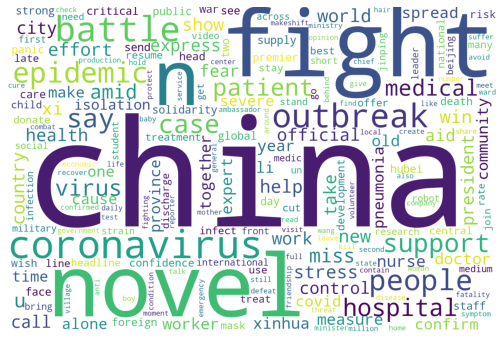

In [22]:
marker_dict, freq_dict = frequency_marker_dictionary(cleaned_df_text, china1L,"negemo" )
plot_wordcloud(marker_dict) #This is the wordcloud of the sum of the marker a words has got in each tweet is in

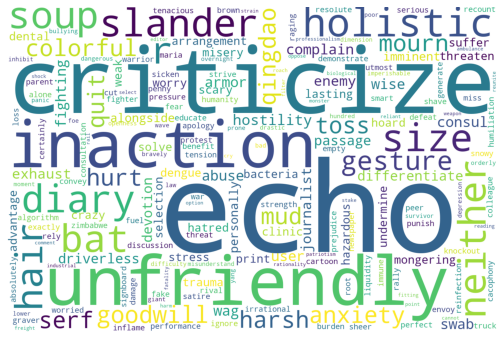

In [23]:
marker_freq = marker_dict.copy()
for word, value in marker_dict.items() : 
    marker_dict[word] = value / freq_dict[word]

plot_wordcloud(marker_dict) # This is the wordcloud of the average of the marker a words has got

In [24]:
A = adj_matrix(freq_dict,cleaned_df_text)   #version to improve for efficiency

In [25]:
# Constructing the graph object from the adjacency matrix
G = nx.convert_matrix.from_numpy_array(A.to_numpy())
G = nx.relabel_nodes(G , mapping = dict([ (i,sorted(list(freq_dict.keys()))[i]) for i in range(len(freq_dict.keys())) ]) ) 
print('is connected: ',nx.is_connected(G))

is connected:  True


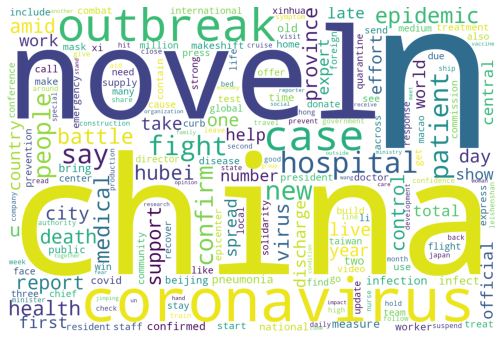

In [26]:
# Calculating the dummy pagerank on graph G
pr3 = nx.algorithms.pagerank(G)
pr3 = dict(sorted(pr3.items(), key=lambda item: item[1],reverse  = True))
#threshold(pr3,0.003)
plot_wordcloud(pr3) #basic pagerank result

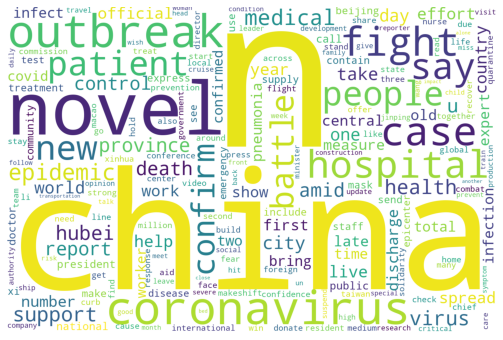

In [27]:
# Calculating the pagerank on graph G, using as weight for teleportation the average marker value
pr = nx.algorithms.pagerank(G,personalization=marker_dict)
pr = dict(sorted(pr.items(), key=lambda item: item[1],reverse  = True))
#threshold(pr,0.003)
plot_wordcloud(pr) #This is the wordcloud of the result of pagerank giving the average marker dict as teleportation vector

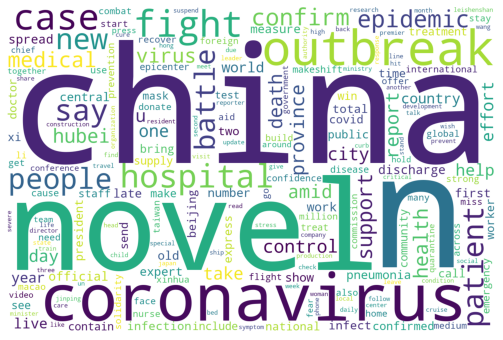

In [28]:
# Calculating the pagerank on graph G, using as weight for teleportation the frequency value
pr2 = nx.algorithms.pagerank(G,personalization=marker_freq)
pr2 = dict(sorted(pr2.items(), key=lambda item: item[1],reverse  = True))
#threshold(pr2,0.003)
plot_wordcloud(pr2) # same as above but this time considering the total sum marker dict

In [29]:
'''
path= "../graph_data/china/"
filename = path +"edgelist.csv"
nx.write_weighted_edgelist(G, filename, delimiter=",")
#add header with appropriate column names
!sed --in-place 1i"Source,Target,Weight" ../graph_data/all_tweets/edgelist.csv

word_nodes = pd.DataFrame.from_dict(freq_dict,orient="index")
word_nodes.reset_index(inplace=True)
word_nodes["Label"] = word_nodes["index"]
word_nodes.rename(columns={"index":"Id",0:"delete"},inplace=True)
word_nodes = word_nodes.drop(columns=['delete'])
word_nodes.to_csv(path + 'nodelist.csv',index=False)

'''

'\npath= "../graph_data/china/"\nfilename = path +"edgelist.csv"\nnx.write_weighted_edgelist(G, filename, delimiter=",")\n#add header with appropriate column names\n!sed --in-place 1i"Source,Target,Weight" ../graph_data/all_tweets/edgelist.csv\n\nword_nodes = pd.DataFrame.from_dict(freq_dict,orient="index")\nword_nodes.reset_index(inplace=True)\nword_nodes["Label"] = word_nodes["index"]\nword_nodes.rename(columns={"index":"Id",0:"delete"},inplace=True)\nword_nodes = word_nodes.drop(columns=[\'delete\'])\nword_nodes.to_csv(path + \'nodelist.csv\',index=False)\n\n'

In [30]:
# all in a function 

def dummy_projections(df_text,df_marker, emo = "negemo", plotWC= True):
    cleaned_df_text = [lemma_pos_cleaner(el) for el in df_text]
    marker_dict, freq_dict = frequency_marker_dictionary(cleaned_df_text, df_marker,emo )
    if plotWC== True :
        plot_wordcloud(marker_dict) #This is the wordcloud of the sum of the marker a words has got in each tweet is in

    marker_freq = marker_dict.copy()
    for word, value in marker_dict.items() : 
        marker_dict[word] = value / freq_dict[word]

    if plotWC== True :
        plot_wordcloud(marker_dict) # This is the wordcloud of the average of the marker a words has got

    A = adj_matrix(freq_dict,cleaned_df_text)   #version to improve for efficiency

    # Constructing the graph object from the adjacency matrix
    G = nx.convert_matrix.from_numpy_array(A.to_numpy())
    G = nx.relabel_nodes(G , mapping = dict([ (i,sorted(list(freq_dict.keys()))[i]) for i in range(len(freq_dict.keys())) ]) ) 
    print('is connected: ',nx.is_connected(G))

    # Calculating the pagerank on graph G, using as weight for teleportation the average marker value
    pr = nx.algorithms.pagerank(G,personalization=marker_dict)
    pr = dict(sorted(pr.items(), key=lambda item: item[1],reverse  = True))
    #threshold(pr,0.003)

    if plotWC== True :
        plot_wordcloud(pr) #This is the wordcloud of the result of pagerank giving the average

    # Calculating the pagerank on graph G, using as weight for teleportation the frequency value
    pr2 = nx.algorithms.pagerank(G,personalization=marker_freq)
    pr2 = dict(sorted(pr2.items(), key=lambda item: item[1],reverse  = True))
    #threshold(pr2,0.003)
    if plotWC== True :
        plot_wordcloud(pr2) # same as above but this time considering the total sum marker dict
    
    return A, pr , pr2 

In [31]:
#B, pr_USA, pr2_USA = dummy_projections(americaTL["Source (B)"],americaTL, emo = "negemo", plotWC= True)

# PROJECTION (f) exploit $m̃_t$ in a PageRank-like context

In [32]:
# create the unnormalized adjency matrix B of the bipartite graph!!!

def unm_adj_matrix(freq_dict,cleaned_df_text,id_tweet):   

    words = sorted(list(freq_dict.keys()))

    B = pd.DataFrame(np.zeros((len(cleaned_df_text),len(words))), columns = words, index = id_tweet )
    
    for i , phrase in enumerate(cleaned_df_text) :
        words_list = phrase.split()
        for w in words_list :
            
            B.loc[id_tweet.loc[i],w] = 1
    
    #B_tw_tw = pd.DataFrame(np.zeros((len(cleaned_df_text),len(cleaned_df_text))), columns = id_tweet, index = id_tweet )
    #B_w_w  =  pd.DataFrame(np.zeros((len(words),len(words))), columns = words, index = words )    
    return B

### china 1st period

In [33]:
df_text = china1L["Source (B)"]
id_tweet = china1L["Source (A)"].reset_index(drop=True)

cleaned_df_text = [lemma_pos_cleaner(el) for el in df_text]
marker_dict, freq_dict = frequency_marker_dictionary(cleaned_df_text, china1L,"negemo" )

B=unm_adj_matrix(freq_dict,cleaned_df_text,id_tweet )

!!! notice that B is NOT the adjacency matrix of the bipartite graph , that would be : 


In [34]:
'''
............. 
  0  .  B  
    0.
.............
B.t  .0  
     .  0
.............
'''

'\n............. \n  0  .  B  \n    0.\n.............\nB.t  .0  \n     .  0\n.............\n'

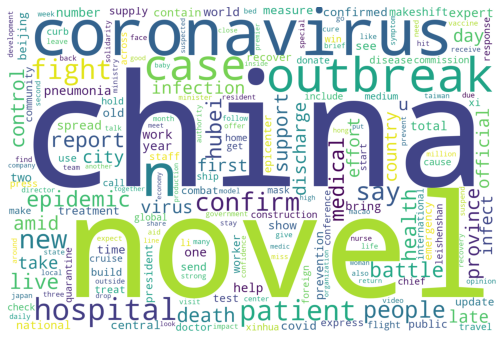

In [35]:
# from B we can retrieve the frequencies for instance : 
freq=np.sum(B).to_dict()
plot_wordcloud(freq) ##  check this,

### check for problematic tweets

In [36]:
B.sum(axis=1)

Source (A)
1231000383151116289    12.0
1230949059462037504    13.0
1230942170200276992    10.0
1230942156816338945     4.0
1230942063266537472    10.0
                       ... 
1228242271604101120    11.0
1228166583429677057     7.0
1227885747266441216    16.0
1227842491350568960     9.0
1227594962688045056    13.0
Length: 2398, dtype: float64

In [37]:
# check that tweets have at least one word
print(B.loc[B.sum(axis=1) == 0].index)
cleaned_df_text[1601] #here it is

#B.loc[B.loc[B.sum(axis=1) == 0].index]

Index([], dtype='object', name='Source (A)')


'recovery rise china step anti virus fight'

In [38]:
# dump it
B.drop(B.loc[B.sum(axis=1) == 0].index, inplace=True, axis=0)

In [39]:
# check again
print(B.loc[B.sum(axis=1) == 0].index) # now its ok

Index([], dtype='object', name='Source (A)')


The tweet incriminated to have 0 word( in the cleaned text) is actually this : 

In [40]:
china1L.reset_index(drop=True).loc[1601] ['Source (B)'] 

" '#DailyChinaBriefing on Feb. 8:\\n1. Recovery rises as China steps up anti-virus fight "

In [41]:
#I drop it 
china1L=china1L.reset_index(drop=True)
china1L.drop(1601, inplace=True, axis=0)
#china1L

In [42]:
china1L.reset_index(drop=True).loc[1601] ['Source (B)'] 

' "A small gift of gratitude! Residents voluntarily order take-out food for the frontline medical workers in E China\'s Fuzhou to encourage them to keep going in the fight against the #coronavirus '

## compute B1 matrix ( row nurmalized version of B)

In [43]:
B1 = B / np.linalg.norm(B,ord=1,axis=1, keepdims=True)

In [44]:
B1.sum(axis=1)

Source (A)
1231000383151116289    1.0
1230949059462037504    1.0
1230942170200276992    1.0
1230942156816338945    1.0
1230942063266537472    1.0
                      ... 
1228242271604101120    1.0
1228166583429677057    1.0
1227885747266441216    1.0
1227842491350568960    1.0
1227594962688045056    1.0
Length: 2398, dtype: float64

## compute B2 matrix(column-normalised-and-transposed)

In [45]:
B2_tmp = B / np.linalg.norm(B,ord=1,axis=0, keepdims=True)
B2=B2_tmp.transpose()
B2

Source (A)  1231000383151116289  1230949059462037504  1230942170200276992  \
5g                          0.0                  0.0                  0.0   
ability                     0.0                  0.0                  0.0   
able                        0.0                  0.0                  0.0   
aboard                      0.0                  0.0                  0.0   
abroad                      0.0                  0.0                  0.0   
...                         ...                  ...                  ...   
yunnan                      0.0                  0.0                  0.0   
zero                        0.0                  0.0                  0.0   
zhejiang                    0.0                  0.0                  0.0   
zimbabwe                    0.0                  0.0                  0.0   
zone                        0.0                  0.0                  0.0   

Source (A)  1230942156816338945  1230942063266537472  1230930184984875009  \
5g                          0.0                  0.0                  0.0   
ability                     0.0                  0.0                  0.0   
able                        0.0                  0.0                  0.0   
aboard                      0.0                  0.0                  0.0   
abroad                      0.0                  0.0                  0.0   
...                         ...                  ...                  ...   
yunnan                      0.0                  0.0                  0.0   
zero                        0.0                  0.0                  0.0   
zhejiang                    0.0                  0.0                  0.0   
zimbabwe                    0.0                  0.0                  0.0   
zone                        0.0                  0.0                  0.0   

Source (A)  1230873561344045057  1230841867274616832  1230806357487390720  \
5g                          0.0                  0.0                  0.0   
ability                     0.0                  0.0                  0.0   
able                        0.0                  0.0                  0.0   
aboard                      0.0                  0.0                  0.0   
abroad                      0.0                  0.0                  0.0   
...                         ...                  ...                  ...   
yunnan                      0.0                  0.0                  0.0   
zero                        0.0                  0.0                  0.0   
zhejiang                    0.0                  0.0                  0.0   
zimbabwe                    0.0                  0.0                  0.0   
zone                        0.0                  0.0                  0.0   

Source (A)  1230764478800621575  ...  1228954369514561541  \
5g                          0.0  ...                  0.0   
ability                     0.0  ...                  0.0   
able                        0.0  ...                  0.0   
aboard                      0.0  ...                  0.0   
abroad                      0.0  ...                  0.0   
...                         ...  ...                  ...   
yunnan                      0.0  ...                  0.0   
zero                        0.0  ...                  0.0   
zhejiang                    0.0  ...                  0.0   
zimbabwe                    0.0  ...                  0.0   
zone                        0.0  ...                  0.0   

Source (A)  1228790231257665536  1228696221008580608  1228621517493137409  \
5g                          0.0                  0.0                  0.0   
ability                     0.0                  0.0                  0.0   
able                        0.0                  0.0                  0.0   
aboard                      0.0                  0.0                  0.0   
abroad                      0.0                  0.0                  0.0   
...                         ..

## power iteration method to retrieve $\tilde{m}_t$  

In [46]:
Mt = B1.dot(B2) #Istarted with the transposed B!!! 
m_i = china1L["negemo"].reset_index(drop=True)
china1L["negemo"]
#np.delete(m_i, obj, axis=0)
#len(m_i)

0        0.00
1        0.00
2        7.69
3        0.00
4        0.00
        ...  
2393    10.00
2394     0.00
2395     0.00
2396     0.00
2397     0.00
Name: negemo, Length: 2397, dtype: float64

In [47]:
def power_iteration(A, m_t0 ,num_simulations: int,alpha=0.85):
    '''
    A   : is the matrix of which you want the eigenvalue
    m_t0: is the starter value
    
    '''
    m_t=m_t0
    for _ in range(num_simulations):
        # calculate the matrix-by-vector product Ab
        m_t1 = alpha * np.dot(A, m_t) + (1.-alpha)*m_t0
        
        # calculate the norm   (here I sum the whole vector and then I divide it)
        m_t1_norm = np.linalg.norm(m_t1,ord=1) 

        # re normalize the vector
        m_t = m_t1 / m_t1_norm #m_t1.sum()
        #print(m_t)

    return m_t

m_t=power_iteration(Mt,m_i, 10)
#np.isnan(m_i)[np.isnan(m_t) ==True]

ValueError: shapes (2398,2398) and (2397,) not aligned: 2398 (dim 1) != 2397 (dim 0)

In [ ]:
# let's compute mw : 
m_w =B2.dot(np.array(m_t))
plot_wordcloud(m_w.to_dict())

NameError: name 'm_t' is not defined

## Results for different time periods  USA

In [48]:
## let' s put it all in a function : 

# all in a function 

def pgrank_projection(df, emo = "negemo", n_iteration = 10, plotWC= True ):
    
    #check that the dataframe have no 0-words tweet
    check_df = len(df[df["WC"] == 0])
    if check_df != 0:
        print("dumping",check_df , "rows")
        df.drop(df[df["WC"] == 0].index, inplace=True, axis=0)  #notice it should affect the original df
        
    df_text = df["Source (B)"]
    id_tweet = df["Source (A)"].reset_index(drop=True)
    
    
    
    cleaned_df_text = [lemma_pos_cleaner(el) for el in df_text]
    marker_dict, freq_dict = frequency_marker_dictionary(cleaned_df_text, df, emo )

    B=unm_adj_matrix(freq_dict,cleaned_df_text,id_tweet )
    
    #spot difficulties in the dataframe : 
    #assert len(B.loc[B.sum(axis=1) == 0])== 0 , "Check the data !! Possible 0-word tweet!"
    check = B.loc[B.sum(axis=1) == 0]
    if len(check)!= 0  :  
        print(check.index)
        assert True, "Check the data !! Possible 0-word tweet!"
    
    
    B1 = B / np.linalg.norm(B,ord=1,axis=1, keepdims=True)
    
    B2_tmp = B / np.linalg.norm(B,ord=1,axis=0, keepdims=True)
    B2=B2_tmp.transpose()
    
    Mt = B1.dot(B2) #I started with the transposed B!!! 
    m_i = df[emo].reset_index(drop=True)
    
    m_t=power_iteration(Mt,m_i, n_iteration)
    m_w =B2.dot(np.array(m_t))
    if plotWC == True : plot_wordcloud(m_w.to_dict())
    
    return B, m_t , m_w 

### America, first period

dumping 1 rows


/home/ftrole/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


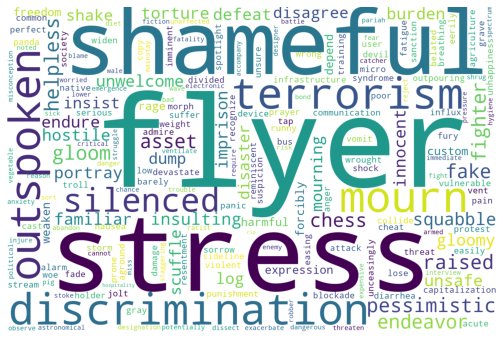

In [49]:
B_am1,m_t_a1,m_w_a1 = pgrank_projection(america1L, emo = "negemo", n_iteration = 20, plotWC= True )
m_w_a1_ord =dict(sorted(m_w_a1.to_dict().items(), key=lambda item: item[1],reverse  = True))

In [50]:
# create weighted nodelist
nodelist_a1=pd.DataFrame(m_w_a1).reset_index()
nodelist_a1.columns=['Id', 'Weight']
nodelist_a1.insert(1, 'Label',  nodelist_a1['Id'], True )
nodelist_a1.to_csv('./network/a1_negemo_nodelist.csv', index=False)

#### Out of context words analysis

In [51]:
with pd.option_context('display.max_colwidth', -1):
    display(america1L.loc[america1L['Source (B)'].str.contains("flyer", case=False)][['Source (B)']])
    display(america1L.loc[america1L['Source (B)'].str.contains("stress", case=False)][['Source (B)']])
    display(america1L.loc[america1L['Source (B)'].str.contains("defeat", case=False)][['Source (B)']])
    display(america1L.loc[america1L['Source (B)'].str.contains("fighter", case=False)][['Source (B)']])
    display(america1L.loc[america1L['Source (B)'].str.contains("silenced", case=False)][['Source (B)']])
    display(america1L.loc[america1L['Source (B)'].str.contains("divided", case=False)][['Source (B)']])
    display(america1L.loc[america1L['Source (B)'].str.contains("torture", case=False)][['Source (B)']])
    display(america1L.loc[america1L['Source (B)'].str.contains("imprison", case=False)][['Source (B)']])


Source (B)
708   Coronavirus: Fake flyers in Los Angeles target Panda Express https://t.co/YCwBtk5fiA                                        
2319   'Fake flyers and face-mask fear: California fights #coronavirus discrimination                                             
2332   'Fake flyers and face-mask fear: California fights #coronavirus discrimination                                             
2342  Fake flyers and face-mask fear: California fights coronavirus discrimination https://t.co/kvXYEvAFiQ https://t.co/OSiXO2hp5J

Source (B)
124  'Stress test': Coronavirus fatalities rise to 361 in China https://t.co/IhLguAnI59

Source (B)
3827   "President Xi Jinping said China will defeat a 'devil' coronavirus that has killed more than 100 people as governments around the world prepared to evacuate their citizens from the country       
3839   "President Xi Jinping said China was sure of defeating a 'devil' coronavirus that has killed more than 100 people as countries around the world look to pull out their citizens from the epicenter

Source (B)
4234  China SARS fighter returns to spotlight in coronavirus battle https://t.co/d3twhQGbdT https://t.co/p7rj1KBMWJ

Source (B)
855   "As China mourns the death of one coronavirus whistleblower, another outspoken citizen is missing from Wuhan â€” and his loved ones fear he's been silenced\n

Source (B)
1194   'Hong Kong had barely begun returning to normal after more than six months of often violent protests when the coronavirus outbreak hit.\n\nNow, lingering resentments in a divided society have collided with the virus to create a perfect storm. 
1200   'Hong Kong had barely begun returning to normal after more than six months of often violent protests when the coronavirus outbreak hit.\n\nNow, lingering resentments in a divided society have collided with the virus to create a perfect storm.

Source (B)
241   '"Before the coronavirus spread, putting the freedom, health and wellbeing of innocent people at risk, millions of innocent Uighurs were already being imprisoned, tortured and killed - because they had the "virus" of Islam."

Source (B)
241   '"Before the coronavirus spread, putting the freedom, health and wellbeing of innocent people at risk, millions of innocent Uighurs were already being imprisoned, tortured and killed - because they had the "virus" of Islam."

- Flyers: Fake flyers telling diners to avoid Asian-American restaurants because of the coronavirus are among a spate of recent racist incidents linked to the outbreak, say California authorities

#### they LIWC marker

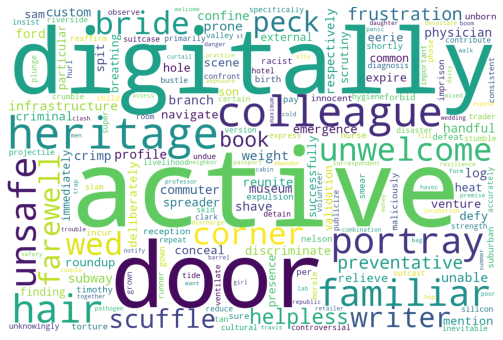

Source (B)
5081   'Tens of millions of things undone, works of genius uncreated. A new AP interactive map of the coronavirusâ€™ spread â€” represented by the lives it has claimed â€” blends data and geography in a way that forces us to see what has happened. By @anthonyted 
5199   'Peruâ€™s heavy reliance on COVID-19 antibody tests to identify active infections is leading to confusion among patients and delays in getting treatment â€“ helping fuel one of the worldâ€™s deadliest coronavirus outbreaks.                                 
5388   'Australiaâ€™s second-largest city, Melbourne, has loosened lockdown restrictions as new and active COVID-19 continue to decline.                                                                                                                               
5447   'Peruâ€™s wide-scale use of rapid COVID-19 antibody tests to diagnose cases could be helping fuel one of the worldâ€™s worst outbreaks. The tests canâ€™t identify early, active infections â€“ leading to delays, confusion.                                   
6323   'The monthly number of suicides in the active duty Army since March, when the impact of the pandemic began to be felt, was above the five-year average of the monthly totals for the force.                                                                     
6525   'West Virginia Governor Jim Justice said at least 18 active Covid-19 outbreaks were traced to church services in the state                                                                                                                                      
6775   '"Audiences either don\'t help or actively hurt debates. Covid-19 has already forced a lot of negative changes on the world of politics. Why don\'t we let the virus create a positive change and gets rid of debate audiences forever?" writes @CillizzaCNN    
9010  'Active' fund managers beaten by benchmarks during COVID volatility https://t.co/pyQPz1joQt https://t.co/Yy8U41cmgR                                                                                                                                              
9030  RT @ReutersUK: Exclusive: Active travel is booming in Britain as millions of commuters, shoppers and schoolchildren get on their bikes to aâ€¦

In [52]:
pgrank_projection(america1L, emo = "they", n_iteration = 20, plotWC= True )
with pd.option_context('display.max_colwidth', -1):
    display(america2L.loc[america2L['Source (B)'].str.contains("active", case=False)][['Source (B)']])

### America, second period

In [53]:
america2L[america2L['Source (A)']== '1312041956084678656']["Source (B)"]
america2L.drop(america2L[america2L['Source (A)']== '1312041956084678656'].index, inplace=True, axis=0)

/home/ftrole/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
#don't plot the wordcloud
B_am2,m_t_a2,m_w_a2 = pgrank_projection(america2L, emo = "negemo", n_iteration = 20, plotWC= False )

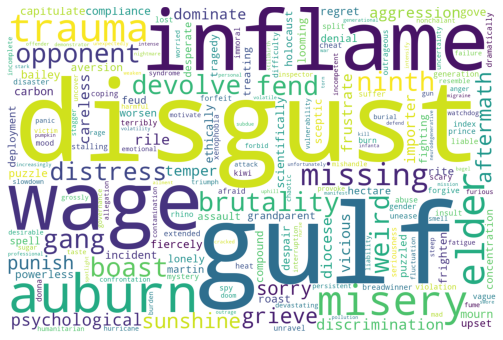

In [55]:
# fixing some words
m_w_a2_ord =dict(sorted(m_w_a2.to_dict().items(), key=lambda item: item[1],reverse  = True))
m_w_a2['wage'] = m_w_a2.pop('wag')
plot_wordcloud(m_w_a2)

#### Out of context words analysis

In [99]:
with pd.option_context('display.max_colwidth', -1):
    display(america2L.loc[america2L['Source (B)'].str.contains("gang", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("wage", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("weird", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("misery", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("wage", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("trauma", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("discrimination", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("psycologic", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("distress", case=False)][['Source (B)']])

Source (B)
5390  RT @AP_Africa: Nigerian protests against police brutality continued for the ninth day, with demonstrators fending off attacks from gangs suâ€¦

Source (B)
6368    'In eight months, coronavirus has killed more one million people, exposed failures of governance, worsened healthcare inequality, and inflamed a long-waged war on the truth                                             
8205   Japan's household spending, real wages extend COVID-driven declines https://t.co/yq0t9M68D2 https://t.co/QbX1pCV6Jx                                                                                                       
8213   Japan's household spending, real wages extend COVID-driven declines https://t.co/eh7QCzLWBh https://t.co/bNQ3PUTvQX                                                                                                       
8535   Hungary PM agrees on big wage hike for doctors as COVID-19 cases rise https://t.co/iotJ9hmFj1 https://t.co/eFn9CizwDZ                                                                                                     
8542   Hungary PM agrees on big wage hike for doctors as COVID-19 cases rise https://t.co/RIA47Ibdic https://t.co/eytwMDNOJj                                                                                                     
10721   'An estimated $3.5 trillion in wages were lost in the first nine months of 2020 due to stay-at-home orders and job losses, the U.N.â€™s International Labour Organization said                                           
10725   'Global workers have lost an estimated $3.5 trillion in wages during the first nine months of 2020 due to stay-at-home orders and job losses, according to an estimate by the U.N.â€™s International Labour Organization

Source (B)
10348   'Why time feels so weird in 2020:

Source (B)
5276   "In a Black community on Chicago's South Side, the triple tragedy of coronavirus, gun violence and economic misery has compounded anger and despair. Yet residents find hope looking beyond the trauma. See the story of Auburn Greshmam told by @AP journalists:

Source (B)
6368    'In eight months, coronavirus has killed more one million people, exposed failures of governance, worsened healthcare inequality, and inflamed a long-waged war on the truth                                             
8205   Japan's household spending, real wages extend COVID-driven declines https://t.co/yq0t9M68D2 https://t.co/QbX1pCV6Jx                                                                                                       
8213   Japan's household spending, real wages extend COVID-driven declines https://t.co/eh7QCzLWBh https://t.co/bNQ3PUTvQX                                                                                                       
8535   Hungary PM agrees on big wage hike for doctors as COVID-19 cases rise https://t.co/iotJ9hmFj1 https://t.co/eFn9CizwDZ                                                                                                     
8542   Hungary PM agrees on big wage hike for doctors as COVID-19 cases rise https://t.co/RIA47Ibdic https://t.co/eytwMDNOJj                                                                                                     
10721   'An estimated $3.5 trillion in wages were lost in the first nine months of 2020 due to stay-at-home orders and job losses, the U.N.â€™s International Labour Organization said                                           
10725   'Global workers have lost an estimated $3.5 trillion in wages during the first nine months of 2020 due to stay-at-home orders and job losses, according to an estimate by the U.N.â€™s International Labour Organization

Source (B)
5276   "In a Black community on Chicago's South Side, the triple tragedy of coronavirus, gun violence and economic misery has compounded anger and despair. Yet residents find hope looking beyond the trauma. See the story of Auburn Greshmam told by @AP journalists:

Source (B)
5395   'Three Jewish congregations are suing New York and Gov. Andrew Cuomo, saying he engaged in â€œanti-Semitic discriminationâ€_x009d_ with a crackdown on religious gatherings. Cuomo says the state is targeting areas where more people are testing positive for COVID-19. 
8130   'Nurses fighting COVID-19 on the front lines are suffering burn-out or psychological distress, the International Council of Nurses said, and many even are subjected to abuse or discrimination outside work                                                              
8136   'Many nurses caring for COVID-19 patients are suffering burn-out or psychological distress, and many have faced abuse or discrimination outside work, the International Council of Nurses said

Empty DataFrame
Columns: [Source (B)]
Index: []

Source (B)
5284   'Millions of distressed Indian manufacturers and traders are counting on the eagerly-awaited October-December festive season to rescue them from their coronavirus catastrophe.                                                            
6454   'Dr. Deborah Birx has confided to aides and friends that she is "distressed" with the direction of the White House coronavirus task force, describing the situation inside the nation\'s response to Covid-19 as nightmarish, sources say. 
8130   'Nurses fighting COVID-19 on the front lines are suffering burn-out or psychological distress, the International Council of Nurses said, and many even are subjected to abuse or discrimination outside work                               
8136   'Many nurses caring for COVID-19 patients are suffering burn-out or psychological distress, and many have faced abuse or discrimination outside work, the International Council of Nurses said                                             
8137  Nurses suffer burn-out, psychological distress in COVID fight - association https://t.co/fzBcuXvxkw https://t.co/ltpEOoRM9b                                                                                                                 
8140  Nurses suffer burn-out, psychological distress in COVID fight - association https://t.co/DjC8ROUe5E https://t.co/BLI23IWIZL                                                                                                                 
8142  Nurses suffer burn-out, psychological distress in COVID fight: association https://t.co/VygqLCxpNo https://t.co/YBLixxwNdJ

In [57]:
# create weighted nodelist
nodelist_a2=pd.DataFrame(m_w_a2).reset_index()
nodelist_a2.columns=['Id', 'Weight']
nodelist_a2.insert(1, 'Label',  nodelist_a2['Id'], True )
nodelist_a2.to_csv('./network/a2_negemo_nodelist.csv', index=False)

- 'wag' is 'wage' maybe something strange happens when pos/lemmatizing words, news mainly refer to the people who loose their job
- 'auburn' is a city where shootings happened in a university
- 'gulf' this one is not important
- 'ambiguity' mainly connected to tweets related to a possible attack to Taiwan performed by China, related to China-USA political relationship but not at all to covid

### third period, America

In [58]:
# don't plot
B_am3,m_t_a3,m_w_a3 = pgrank_projection(america3L, emo = "negemo", n_iteration = 20, plotWC= False )
m_w_a3_ord =dict(sorted(m_w_a3.to_dict().items(), key=lambda item: item[1],reverse  = True))

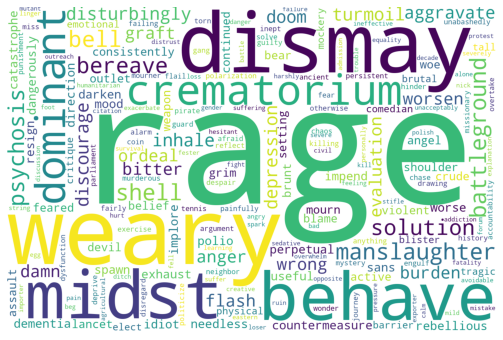

In [59]:
# fixing words
m_w_a3['rage'] = m_w_a3.pop('rag')
plot_wordcloud(m_w_a3)

#### Out of context words analysis

In [109]:
with pd.option_context('display.max_colwidth', -1):
    display(america3L.loc[america3L['Source (B)'].str.contains("doom", case=False)][['Source (B)']])
    display(america3L.loc[america3L['Source (B)'].str.contains("implor", case=False)][['Source (B)']])
    display(america3L.loc[america3L['Source (B)'].str.contains("rebellious", case=False)][['Source (B)']])
    display(america3L.loc[america3L['Source (B)'].str.contains("impend", case=False)][['Source (B)']])
    display(america3L.loc[america3L['Source (B)'].str.contains("needless", case=False)][['Source (B)']])

Source (B)
11096   'â€¢ US official warns of "impending doom" amid average rise of 63,000 new daily COVID infections                                                                                                                                                                                  
11102   'Top US health official warns of â€œimpending doomâ€_x009d_ as COVID-19 cases rise amidst vaccine rollout                                                                                                                                                                          
11373   'Saying she has a feeling of "impending doom," the CDC director implored Americans not to let their guard down in the fight against COVID-19. Dr. Rochelle Walensky warned that the U.S. could experience another spike in cases and suffer needless deaths.                       
11624  Warnings of "impending doom" in US as Covid cases and deaths rise https://t.co/DmVDNWg04l                                                                                                                                                                                           
11626  Covid-19: CDC head warns of 'impending doom' in UIS https://t.co/LrLnzDVJL9                                                                                                                                                                                                         
11944   'â€œWe have so much to look forward to, so much promise and potential of where we are and so much reason for hope. But right now, Iâ€™m scared.â€_x009d_ Dr. Rochelle Walensky says she has a feeling of â€œimpending doomâ€_x009d_ as the US surpasses 30 million Covid-19 cases. 
11949   'â€œWe have so much to look forward to, so much promise and potential of where we are and so much reason for hope. But right now, Iâ€™m scared.â€_x009d_ Dr. Rochelle Walensky says she has a feeling of â€œimpending doomâ€_x009d_ as the US surpasses 30 million Covid-19 cases. 
13128   "President Biden said 90% of U.S. adults would be eligible for COVID-19 vaccination by April 19 as the CDC warned of 'impending doom' amid a surge in cases                                                                                                                        
13137   'Dr. Rochelle Walensky, the head of the CDC, warned of â€˜impending doomâ€™ and pleaded with Americans to continue to take precautions as the country surpassed 30 million cases of COVID-19                                                                                       
13146  'Impending doom': CDC, White House warn of new surge as U.S. COVID-19 cases rise https://t.co/OD8Bfr0ze6 https://t.co/D61CMM8AFB

Source (B)
11373   'Saying she has a feeling of "impending doom," the CDC director implored Americans not to let their guard down in the fight against COVID-19. Dr. Rochelle Walensky warned that the U.S. could experience another spike in cases and suffer needless deaths.

Source (B)
13010  Merkel's last stand: how rebellious states hurt Germany's COVID response https://t.co/En3zfaMaZb https://t.co/3xMIO2gQ1a
13017  Merkel's last stand: how rebellious states hurt Germany's COVID response https://t.co/okdzcgXmUG https://t.co/k7BiSMJt5I

Source (B)
11096   'â€¢ US official warns of "impending doom" amid average rise of 63,000 new daily COVID infections                                                                                                                                                                                  
11102   'Top US health official warns of â€œimpending doomâ€_x009d_ as COVID-19 cases rise amidst vaccine rollout                                                                                                                                                                          
11373   'Saying she has a feeling of "impending doom," the CDC director implored Americans not to let their guard down in the fight against COVID-19. Dr. Rochelle Walensky warned that the U.S. could experience another spike in cases and suffer needless deaths.                       
11624  Warnings of "impending doom" in US as Covid cases and deaths rise https://t.co/DmVDNWg04l                                                                                                                                                                                           
11626  Covid-19: CDC head warns of 'impending doom' in UIS https://t.co/LrLnzDVJL9                                                                                                                                                                                                         
11944   'â€œWe have so much to look forward to, so much promise and potential of where we are and so much reason for hope. But right now, Iâ€™m scared.â€_x009d_ Dr. Rochelle Walensky says she has a feeling of â€œimpending doomâ€_x009d_ as the US surpasses 30 million Covid-19 cases. 
11949   'â€œWe have so much to look forward to, so much promise and potential of where we are and so much reason for hope. But right now, Iâ€™m scared.â€_x009d_ Dr. Rochelle Walensky says she has a feeling of â€œimpending doomâ€_x009d_ as the US surpasses 30 million Covid-19 cases. 
13128   "President Biden said 90% of U.S. adults would be eligible for COVID-19 vaccination by April 19 as the CDC warned of 'impending doom' amid a surge in cases                                                                                                                        
13137   'Dr. Rochelle Walensky, the head of the CDC, warned of â€˜impending doomâ€™ and pleaded with Americans to continue to take precautions as the country surpassed 30 million cases of COVID-19                                                                                       
13146  'Impending doom': CDC, White House warn of new surge as U.S. COVID-19 cases rise https://t.co/OD8Bfr0ze6 https://t.co/D61CMM8AFB

Source (B)
11373   'Saying she has a feeling of "impending doom," the CDC director implored Americans not to let their guard down in the fight against COVID-19. Dr. Rochelle Walensky warned that the U.S. could experience another spike in cases and suffer needless deaths.

In [61]:
# create weighted nodelist
nodelist_a3=pd.DataFrame(m_w_a3).reset_index()
nodelist_a3.columns=['Id', 'Weight']
nodelist_a3.insert(1, 'Label',  nodelist_a3['Id'], True )
nodelist_a3.to_csv('./network/a3_negemo_nodelist.csv', index=False)

- 'weary' synonim for tired: weary american because of the pandemic 
- 'rag' it is probably the prefix for rage, in italian "infuriare"
- "dismay" = sgomento

## Results for different time periods  China

### First period, China

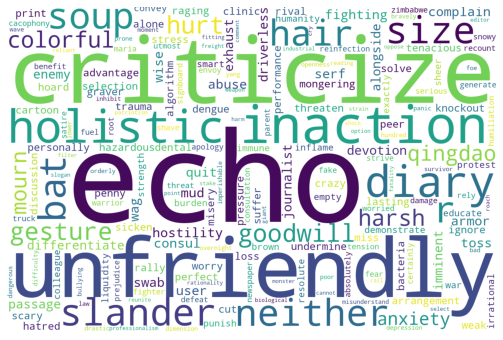

0
5g        7.402753e-04
ability   7.763735e-04
able      2.111979e-04
aboard    1.111598e-04
abroad    2.439311e-04
...                ...
yunnan    3.234357e-07
zero      3.347310e-04
zhejiang  3.807500e-04
zimbabwe  1.624427e-03
zone      1.630121e-04

[2923 rows x 1 columns]

In [62]:
B_ch1,m_t_c1,m_w_c1 = pgrank_projection(china1L, emo = "negemo", n_iteration = 20, plotWC= True )
m_w_c1_ord =dict(sorted(m_w_c1.to_dict().items(), key=lambda item: item[1],reverse  = True))
pd.DataFrame(m_w_c1)

#### Out of context words

In [116]:
with pd.option_context('display.max_colwidth', -1):
    display(china1L.loc[china1L['Source (B)'].str.contains(" knockout", case=False)][['Source (B)']])
    display(china1L.loc[china1L['Source (B)'].str.contains("cartoon", case=False)][['Source (B)']])
    display(china1L.loc[china1L['Source (B)'].str.contains("perfect", case=False)][['Source (B)']])
    display(china1L.loc[china1L['Source (B)'].str.contains("tenacious", case=False)][['Source (B)']])
    display(china1L.loc[china1L['Source (B)'].str.contains("snowy", case=False)][['Source (B)']])
    display(china1L.loc[china1L['Source (B)'].str.contains("diary", case=False)][['Source (B)']])


Source (B)
2155   '#FightVirus cartoon: With worldwide supports, the tenacious Chinese people will end the battle with a perfect knockout to their rival, the novel #coronavirus

Source (B)
2155   '#FightVirus cartoon: With worldwide supports, the tenacious Chinese people will end the battle with a perfect knockout to their rival, the novel #coronavirus

Source (B)
2155   '#FightVirus cartoon: With worldwide supports, the tenacious Chinese people will end the battle with a perfect knockout to their rival, the novel #coronavirus

Source (B)
2155   '#FightVirus cartoon: With worldwide supports, the tenacious Chinese people will end the battle with a perfect knockout to their rival, the novel #coronavirus

Source (B)
1397   'Front-line workers stick to their post in fighting against the novel coronavirus despite low temperature and snowy weather in Hubei, the hardest-hit province in China.

Source (B)
1104  Reporter's Diary: They have no fear in the battle against #coronavirus https://t.co/Zk2l6hc8fU

In [64]:
# create weighted nodelist
nodelist_c1=pd.DataFrame(m_w_c1).reset_index()
nodelist_c1.columns=['Id', 'Weight']
nodelist_c1.insert(1, 'Label',  nodelist_c1['Id'], True )
nodelist_c1.to_csv('./network/c1_negemo_nodelist.csv', index=False)

- 'unfriendly': news about unfriendly US comments towards china 
- 'soup' and 'bat': covid doesn't com from bat soup or biolab, "Stop #infodemic that spreads fear"

#### they marker (apparently no valuable results)

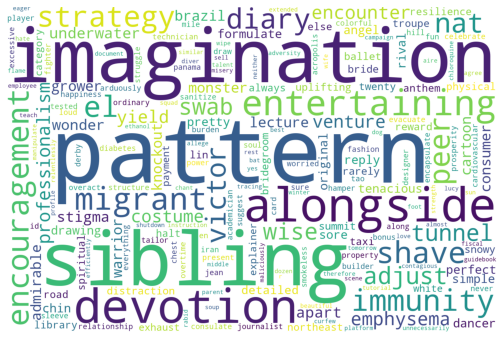

In [65]:
B_ch1,m_t_c1,m_w_c1 = pgrank_projection(china1L, emo = "they", n_iteration = 20, plotWC= True )
m_w_c1_ord =dict(sorted(m_w_c1.to_dict().items(), key=lambda item: item[1],reverse  = True))

In [66]:
with pd.option_context('display.max_colwidth', -1):
    display(china1L.loc[china1L['Source (B)'].str.contains("imagination", case=False)][['Source (B)']])  

Source (B)
1302   'Salvadoran kids send their love and support to China! Valeria, 13, and Javier, 11, are Salvadoran siblings who love to draw! They are using their imagination to show their support for China during the novel # coronavirus epidemic

### Second period, China

In [67]:
china2L[china2L['Source (A)']== '1316614782095482880']["Source (B)"]
china2L.drop(china2L[china2L['Source (A)']== '1316614782095482880'].index, inplace=True, axis=0)

/home/ftrole/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


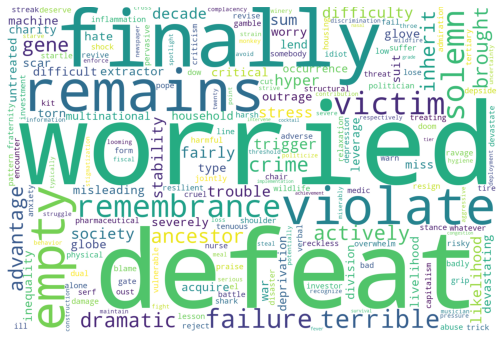

In [68]:
#B_ch2,m_t_c2,m_w_c2 = pgrank_projection(china2L, emo = "negemo", n_iteration = 20, plotWC= True )
#eliminate 'liability' and 'criminal', they appear to be out of context 
china2Lcleaned=china2L.drop(china2L[china2L['Source (B)'].str.contains('criminal', case=False)].index, inplace=False, axis=0)
B_ch2,m_t_c2,m_w_c2 = pgrank_projection(china2Lcleaned, emo = "negemo", n_iteration = 20, plotWC= True )
m_w_c2_ord =dict(sorted(m_w_c2.to_dict().items(), key=lambda item: item[1],reverse  = True))

#### Out of context words analysis

In [123]:
with pd.option_context('display.max_colwidth', -1):
    display(china2L.loc[china2L['Source (B)'].str.contains("actively", case=False)][['Source (B)']])
    display(china2L.loc[china2L['Source (B)'].str.contains("devastating", case=False)][['Source (B)']])
    display(china2L.loc[china2L['Source (B)'].str.contains("scar", case=False)][['Source (B)']])
    display(china2L.loc[china2L['Source (B)'].str.contains("household", case=False)][['Source (B)']])


Source (B)
18407  RT @cgtnamerica: Among all the U.S. states actively fighting the coronavirus, Vermont stands out for its achievement of maintaining low tesâ€¦

Source (B)
18790  RT @cgtnamerica: The IMF warns that the global impact of the coronavirus will leave long-lasting and devastating scars. Hereâ€™s who will beâ€¦      
19903   'Signs of #COVID19 resurgence seen across U.S.\nEconomic strain of continued COVID-19 services could be devastating for many hospitals, experts say

Source (B)
18790  RT @cgtnamerica: The IMF warns that the global impact of the coronavirus will leave long-lasting and devastating scars. Hereâ€™s who will beâ€¦

Source (B)
19326   'A Chinese charity is lending a helping hand to vulnerable households in Ethiopia, especially during the COVID-19 pandemic. African leaders say the continent is leveraging on robust cooperation with China to acquire capital and expertise to back the war against deprivation

- first 3 words are related to Pompeo: china accused him and america of trying to stop china development. Unrelated to covid 
- 'thief' relationship between chna and taiwan



In [70]:
# create weighted nodelist
nodelist_c2=pd.DataFrame(m_w_c2).reset_index()
nodelist_c2.columns=['Id', 'Weight']
nodelist_c2.insert(1, 'Label',  nodelist_c2['Id'], True )
nodelist_c2.to_csv('./network/c2_negemo_nodelist.csv', index=False)

### Third period, China

In [71]:
china3L[china3L['Source (A)']== '1372064322671669248']["Source (B)"]
china3L.drop(china3L[china3L['Source (A)']== '1372064322671669248'].index, inplace=True, axis=0)

/home/ftrole/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


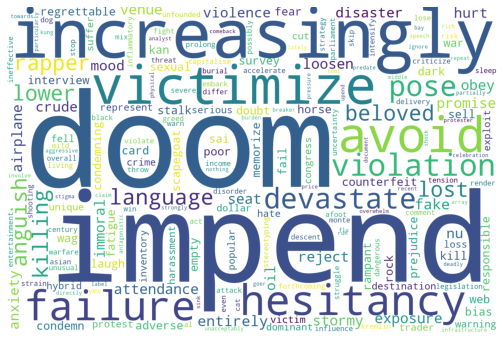

In [72]:
B_ch3,m_t_c3,m_w_c3 = pgrank_projection(china3L, emo = "negemo", n_iteration = 20, plotWC= True )
m_w_c3_ord =dict(sorted(m_w_c3.to_dict().items(), key=lambda item: item[1],reverse  = True))

#### Out of context words analysis

In [134]:

with pd.option_context('display.max_colwidth', -1):
    display(china3L.loc[china3L['Source (B)'].str.contains("sexual", case=False)][['Source (B)']])
    display(china3L.loc[china3L['Source (B)'].str.contains("devastate", case=False)][['Source (B)']])
    display(china3L.loc[china3L['Source (B)'].str.contains("lost", case=False)][['Source (B)']])
    display(china3L.loc[china3L['Source (B)'].str.contains("beloved", case=False)][['Source (B)']])


Source (B)
21002   '#HeadlinesWatch:\nSome 17% of Asian Americans reported sexual harassment, stalking, physical threats and other incidents over past year, up from 11% the year before: latest survey from anti-hate group ADL. Original report:

Source (B)
20127  RT @cgtnamerica: Brazil has been devastated by the impacts of COVID-19, which has killed thousands in the poorest parts of the country. CGTâ€¦

Source (B)
20073   "From the death of a beloved rapper to protests against the killing of Blacks in America to the anguish of losing a lost one to COVID-19 and even a historic celebration. \n\nThese are CGTN America's picks for photos of the week. 
20089  RT @cgtnamerica: More than 350,000 Brazilians have died during the COVID-19 pandemic. Many Brazilians who've lost their loved ones are suffâ€¦                                                                                        
20107  RT @cgtnamerica: More than 350,000 Brazilians have died during the COVID-19 pandemic. Many Brazilians whoâ€™ve lost their loved ones are suffâ€¦                                                                                      
20268  RT @cgtnamerica: A new model suggests nearly 40,000 children have lost a parent to COVID-19.\n\nThe estimates published this week in the jourâ€¦                                                                                      
20949   'London memorizes victims of COVID-19 in a unique way. Each heart on the National COVID Memorial Wall represents a life lost to the pandemic

Source (B)
20073   "From the death of a beloved rapper to protests against the killing of Blacks in America to the anguish of losing a lost one to COVID-19 and even a historic celebration. \n\nThese are CGTN America's picks for photos of the week.

- 'victimise' Asian Americans are increasingly finding themselves victimized by violence during COVID-19 pandemic. See the disturbing

In [74]:
# create weighted nodelist
nodelist_c3=pd.DataFrame(m_w_c3).reset_index()
nodelist_c3.columns=['Id', 'Weight']
nodelist_c3.insert(1, 'Label',  nodelist_c3['Id'], True )
nodelist_c3.to_csv('./network/c3_negemo_nodelist.csv', index=False)

#  positive emotion :

### First period, China

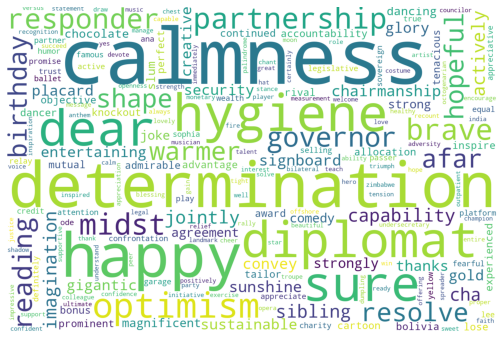

In [75]:
B_ch1p,m_t_c1p,m_w_c1p = pgrank_projection(china1L, emo = "posemo", n_iteration = 20, plotWC= True )
m_w_c1_ordp =sorted(m_w_c1p.to_dict().items(), key=lambda item: item[1],reverse  = True)

In [76]:
m_w_c1_ordp[1:10]

[('determination', 0.006467767125299154),
 ('happy', 0.005972588677912179),
 ('hygiene', 0.004096659872619702),
 ('diplomat', 0.0038808004555449115),
 ('dear', 0.003831070928670589),
 ('sure', 0.003805220191807796),
 ('optimism', 0.003603546611886712),
 ('partnership', 0.003449344636486207),
 ('brave', 0.003373568618247936)]

#### Out of context words

In [77]:
with pd.option_context('display.max_colwidth', -1):
    display(china1L.loc[china1L['Source (B)'].str.contains("castellano", case=False)][['Source (B)']])
    display(china1L.loc[china1L['Source (B)'].str.contains("couplet", case=False)][['Source (B)']])
    display(china1L.loc[china1L['Source (B)'].str.contains("optimism", case=False)][['Source (B)']])
    display(china1L.loc[china1L['Source (B)'].str.contains("petal", case=False)][['Source (B)']])
    display(china1L.loc[china1L['Source (B)'].str.contains("heartfelt", case=False)][['Source (B)']])


Empty DataFrame
Columns: [Source (B)]
Index: []

Empty DataFrame
Columns: [Source (B)]
Index: []

Source (B)
121   "Doctor's got talent!\n\nA doctor from NW China's Xinjiang at a makeshift hospital in #Wuhan was asked by patients with mild #coronavirus symptoms to teach them a traditional Uygur dance, bringing optimism and fun to the hospital #COVID19 
572  #Coronavirus patients display optimism through dancing https://t.co/bj3gM6r0u6                                                                                                                                                                  
680   'Patients at makeshift hospitals show optimism, calmness and strong determination despite #CoronavirusOutbreak

Empty DataFrame
Columns: [Source (B)]
Index: []

Empty DataFrame
Columns: [Source (B)]
Index: []

- 'castellano', 'heartfelt': news aboutsupport from other countries

### Second period, China

In [78]:
#china2L[china2L['Source (A)']== '1316614782095482880']["Source (B)"]
#china2L.drop(china2L[china2L['Source (A)']== '1316614782095482880'].index, inplace=True, axis=0)

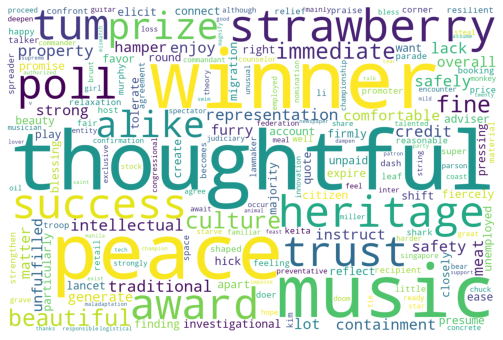

In [79]:
#B_ch2,m_t_c2,m_w_c2 = pgrank_projection(china2L, emo = "negemo", n_iteration = 20, plotWC= True )
#eliminate 'liability' and 'criminal', they appear to be out of context 
china2Lcleaned=china2L.drop(china2L[china2L['Source (B)'].str.contains('criminal', case=False)].index, inplace=False, axis=0)
B_ch2p,m_t_c2p,m_w_c2p = pgrank_projection(china2Lcleaned, emo = "posemo", n_iteration = 20, plotWC= True )
m_w_c2_ordp =sorted(m_w_c2p.to_dict().items(), key=lambda item: item[1],reverse  = True)

In [80]:
m_w_c2_ordp[0:10]

[('thoughtful', 0.011288504543939428),
 ('winner', 0.011288504543939428),
 ('peace', 0.010073190563975267),
 ('music', 0.009734225795541701),
 ('strawberry', 0.009734225795541701),
 ('award', 0.008857876584011106),
 ('heritage', 0.008857876584011106),
 ('tum', 0.008857876584011106),
 ('success', 0.008759881957348633),
 ('poll', 0.008653463292816278)]

#### Out of context words analysis

In [81]:
with pd.option_context('display.max_colwidth', -1):
    display(china2L.loc[china2L['Source (B)'].str.contains("skipping", case=False)][['Source (B)']])
    display(china2L.loc[china2L['Source (B)'].str.contains(" josh ", case=False)][['Source (B)']])
    display(china2L.loc[china2L['Source (B)'].str.contains("pear", case=False)][['Source (B)']])
    display(china2L.loc[china2L['Source (B)'].str.contains("tum", case=False)][['Source (B)']])


Empty DataFrame
Columns: [Source (B)]
Index: []

Empty DataFrame
Columns: [Source (B)]
Index: []

Source (B)
18227  RT @cgtnamerica: The First Lady of the U.S. Melania Trump canceled her campaign appearance scheduled in Pennsylvania for Tuesday night, asâ€¦                                                                                                                  
18734   'The Iraqi Health Ministry on Sunday reported 3,438 new COVID-19 cases, as the health authorities banned the entry of foreign travelers into the country amid the appearance of new strains of the coronavirus in the neighboring countries. (Xinhua)         
19845   'Trump, who tested positive for #COVID19 on Oct. 1, is "no longer considered a transmission risk to others," his doctor says.\n"I\'m feeling great," says the president after being medically cleared, while declaring COVID-19 is "disappearing" in the U.S.

Source (B)
18385  RT @cgtnamerica: During this year's Hispanic Heritage Month, Dr. Rigoberta MenchÃº Tum, who was awarded the Nobel Peace Prize in 1992, shareâ€¦                                                                                               
18672   '#Beijing has vowed to promote vaccine development and made contingency plans to cope with the epidemic as the Chinese capital city is entering autumn and risk of virus resurgence gets higher.                                             
18972   "As economic recovery picked up steam in Q3, China is confident of sustaining the current momentum amid the effective control of COVID-19 and the govt's sweeping efforts to stimulate demand and consumption                                
19284   "China's online travel agencies reported better-than-expected booking figures during the eight-day National Day and Mid-Autumn Festival holiday, showing the country's tourism industry is steadily recovering from the coronavirus epidemic 
19409   "China's railways saw 15.09 million passenger trips on Thursday, a record high for the period since the start of the COVID-19 epidemic, due to the National Day and Mid-Autumn Festival holiday                                              
19422   "China's railways saw 15.09 million passenger trips on Thursday, a record high for the period since the start of the COVID-19 epidemic, due to the National Day and Mid-Autumn Festival holiday, which runs from Oct. 1 to 8                 
19619   'Trade between China and Ireland maintains a very positive momentum despite the impact of the COVID-19 pandemic, says Chinese Ambassador to Ireland He Xiangdong

- first 4 words are not related to covid, except maybe for skipping ? 




### Third period, China

In [82]:
#china3L[china3L['Source (A)']== '1372064322671669248']["Source (B)"]
#china3L.drop(china3L[china3L['Source (A)']== '1372064322671669248'].index, inplace=True, axis=0)

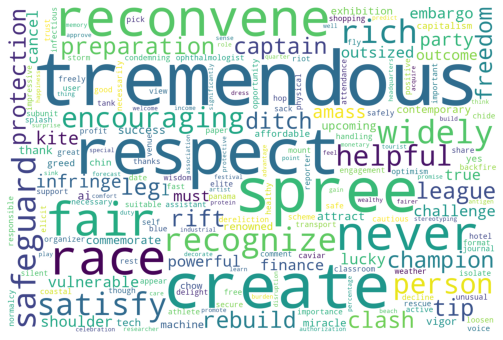

In [83]:
B_ch3p,m_t_c3p,m_w_c3p = pgrank_projection(china3L, emo = "posemo", n_iteration = 20, plotWC= True )
m_w_c3_ordp =sorted(m_w_c3p.to_dict().items(), key=lambda item: item[1],reverse  = True)

In [84]:
m_w_c3_ordp[0:10]

[('tremendous', 0.013313612016332318),
 ('respect', 0.009392608726182005),
 ('create', 0.00923451897227359),
 ('spree', 0.00887807065085726),
 ('reconvene', 0.008555920527935816),
 ('race', 0.007794892277469689),
 ('never', 0.0074913893604654875),
 ('fair', 0.00684754648306756),
 ('recognize', 0.00684754648306756),
 ('safeguard', 0.00684754648306756)]

#### Out of context words analysis

In [85]:

with pd.option_context('display.max_colwidth', -1):
    display(china3L.loc[china3L['Source (B)'].str.contains("tremendous", case=False)][['Source (B)']])
    display(china3L.loc[china3L['Source (B)'].str.contains("spree", case=False)][['Source (B)']])
    display(china3L.loc[china3L['Source (B)'].str.contains("race", case=False)][['Source (B)']])


Source (B)
20087  RT @cgtnamerica: The pandemic has created tremendous challenges for Brazilâ€™s health care system. So the state of Sao Paulo created a â€˜Volunâ€¦

Source (B)
21097  In a vaccine shopping spree, the rich world is having a good pandemic. https://t.co/aEvWHFbBHI

Source (B)
20966   'A group of 20 tourist guides in South Africa is learning mandarin to brace for incoming Chinese tourists as the COVID-19 pandemic is easing in the country                                                                                                      
21095   '"I think Chinese vaccines are good for all people, and so we trust this vaccine. We support our country\'s cooperation with China," says a Serbian.\n#XinhuaHeadlines: Trust in Chinese vaccines gives European countries head start in global inoculation race

# positive emotion America

### America, first period

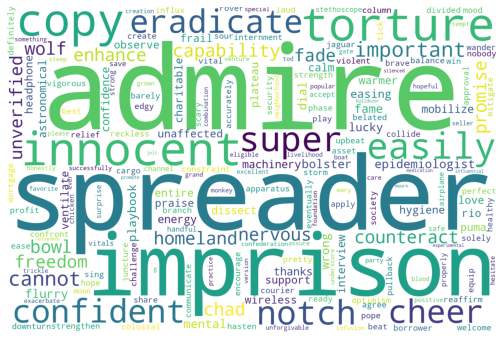

In [86]:
B_am1p,m_t_a1p,m_w_a1p = pgrank_projection(america1L, emo = "posemo", n_iteration = 20, plotWC= True )
m_w_a1_ordp =sorted(m_w_a1p.to_dict().items(), key=lambda item: item[1],reverse  = True)

In [87]:
m_w_a1_ordp[0:10]

[('admire', 0.007484358297318682),
 ('spreader', 0.00638044601791465),
 ('imprison', 0.006344555784973341),
 ('innocent', 0.006344555784973341),
 ('torture', 0.006344555784973341),
 ('copy', 0.006081587601996758),
 ('easily', 0.006081587601996758),
 ('super', 0.005708000954433843),
 ('notch', 0.00523455840072203),
 ('confident', 0.004983938962648832)]

#### Out of context words analysis

In [88]:
with pd.option_context('display.max_colwidth', -1):
    display(america1L.loc[america1L['Source (B)'].str.contains("adrift", case=False)][['Source (B)']])
    display(america1L.loc[america1L['Source (B)'].str.contains("relaxation", case=False)][['Source (B)']])
    display(america1L.loc[america1L['Source (B)'].str.contains("admire", case=False)][['Source (B)']])
    display(america1L.loc[america1L['Source (B)'].str.contains("imprison", case=False)][['Source (B)']])
    display(america1L.loc[america1L['Source (B)'].str.contains("innocent", case=False)][['Source (B)']])
    display(america1L.loc[america1L['Source (B)'].str.contains("torture", case=False)][['Source (B)']])



Empty DataFrame
Columns: [Source (B)]
Index: []

Empty DataFrame
Columns: [Source (B)]
Index: []

Source (B)
1787   'Why Singaporeâ€™s admired coronavirus-fighting playbook cannot be easily copied in other countries 
1817   'Why Singaporeâ€™s admired coronavirus-fighting playbook cannot be easily copied in other countries

Source (B)
241   '"Before the coronavirus spread, putting the freedom, health and wellbeing of innocent people at risk, millions of innocent Uighurs were already being imprisoned, tortured and killed - because they had the "virus" of Islam."

Source (B)
241   '"Before the coronavirus spread, putting the freedom, health and wellbeing of innocent people at risk, millions of innocent Uighurs were already being imprisoned, tortured and killed - because they had the "virus" of Islam."

Source (B)
241   '"Before the coronavirus spread, putting the freedom, health and wellbeing of innocent people at risk, millions of innocent Uighurs were already being imprisoned, tortured and killed - because they had the "virus" of Islam."

- does not seem very positive

### America, second period

In [89]:
#america2L[america2L['Source (A)']== '1312041956084678656']["Source (B)"]
#america2L.drop(america2L[america2L['Source (A)']== '1312041956084678656'].index, inplace=True, axis=0)

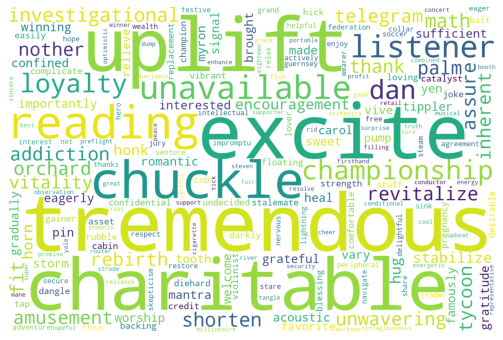

In [90]:
B_am2p,m_t_a2p,m_w_a2p = pgrank_projection(america2L, emo = "posemo", n_iteration = 20, plotWC= True )
m_w_a2_ordp =sorted(m_w_a2p.to_dict().items(), key=lambda item: item[1],reverse  = True)

In [91]:
m_w_a2_ordp[0:10]

[('tremendous', 0.0019863182444454295),
 ('excite', 0.0017976699270799456),
 ('uplift', 0.0017159409937145525),
 ('charitable', 0.0015726345661913545),
 ('chuckle', 0.0015726345661913545),
 ('reading', 0.0015726345661913545),
 ('unavailable', 0.0015725015225979222),
 ('listener', 0.001425085980990328),
 ('championship', 0.0013976755511001641),
 ('dan', 0.0013724787019833552)]

#### Out of context words analysis

In [92]:
with pd.option_context('display.max_colwidth', -1):
    display(america2L.loc[america2L['Source (B)'].str.contains("tremendous", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("uplift", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("charitable", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("chuckle", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("reading", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("unavailable", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("dan", case=False)][['Source (B)']])

Source (B)
6751   '"I want to thank everybody for the tremendous support"\n\nIn his first tweet since announcing he had tested positive for Covid-19, President Trump shared words of thanks and encouragement during a short 18-second long video.

Source (B)
4977   "Can Trump really take credit for America's pre-COVID-19 strength? Did his policies really uplift all Americans? The truth, explained ðŸ‘‰

Source (B)
6583   '"There\'s really no charitable reading possible for McConnell\'s chuckling at a debate over the question of Covid relief," writes @JillFilipovic for @CNNOpinion 
6586   '"There\'s really no charitable reading possible for McConnell\'s chuckling at a debate over the question of Covid relief," writes @JillFilipovic for @CNNOpinion

Empty DataFrame
Columns: [Source (B)]
Index: []

Source (B)
5351   RT @AP_Europe: Swiss authorities put 2,500 university students under quarantine in Lausanne, say coronavirus is spreading too fast to do anâ€¦                                                                                                                                
5938    'The lowest risk for contracting or spreading the highly infectious coronavirus is simply celebrating Thanksgiving in your own home with members of your household and/or virtually with extended family, the CDC says.                                                      
6160    'Going into some New York City courthouses that have begun to resume in-person activity poses "an unacceptably high risk" of spreading Covid-19 because of issues with crowding, ventilation and improper use of masks, according to a third-party report.                   
6236    "President Trump is currently at Walter Reed National Military Medical Center after announcing that he had tested positive for Covid-19.\n\nIf you're just reading in now, here's a recap of the latest developments.                                                        
6545    'â€œItâ€™s really spreading quite quickly â€¦ A large gathering is just not recommended at this time,â€_x009d_ Wisconsin infectious disease specialist Dr. Michael Landrum says as Covid-19 cases surge in the state and President Trump is set to hold a rally there today. 
6583    '"There\'s really no charitable reading possible for McConnell\'s chuckling at a debate over the question of Covid relief," writes @JillFilipovic for @CNNOpinion                                                                                                            
6586    '"There\'s really no charitable reading possible for McConnell\'s chuckling at a debate over the question of Covid relief," writes @JillFilipovic for @CNNOpinion                                                                                                            
7484    'U.S.-China tensions took center stage at the U.N. General Assembly, held virtually for the first time, with President Trump blaming China for COVID-19 spreading around the world                                                                                           
8044   RT @ReutersUK: Prime Minister Boris Johnsonâ€™s government needs to impose further COVID-19 restrictions and the risk of spreading the virusâ€¦                                                                                                                               
9038    'Prime Minister Boris Johnson told the British people to work from home where possible and ordered restaurants and bars to close early to tackle a fast-spreading second wave of COVID-19                                                                                    
9043    'British Prime Minister Boris Johnson told people to work from home where possible and ordered bars and restaurants to close early to tackle a fast-spreading second wave of COVID-19 with restrictions lasting probably six months                                          
9956   Coronavirus lit fuse in Kyrgyzstan, spreading unrest in Putin's back yard https://t.co/ev0NjL6b8m https://t.co/4a2YmyKSM4                                                                                                                                                     
10082   'A member of the Dallas Young Republicans was isolating at home to avoid potentially spreading the coronavirus after his exposure to President Trump who tested positive last week, a day after the donorsâ€™ event                                                          
10095  Mid-recovery, coronavirus spreading, global central bankers take stock https://t.co/0d067Ko9bO https://t.co/x85LOkHzri                                                                                                                                                        
10105  Mid-recovery, coronavirus spreading, global central bankers take stock https://t.co/98jbxN

Source (B)
4710   "President Trump declares his diagnosis with COVID-19 was â€œa blessing from Godâ€_x009d_ and promises to make currently unavailable experimental drugs 'free'

Source (B)
4705   Jordan enters 48-hour nationwide coronavirus lockdown https://t.co/CM3DM9t0Ad https://t.co/3Qpd76KBC0                                                                                                                                                             
4860    'Jordanâ€™s King Abdullah II and Prime Minister Bisher al-Khaswaneh swore in a new government that face an uphill battle to revive an economy weakened by COVID-19                                                                                               
4984    "Deep sea fishing is one of the world's most dangerous jobs. Due to COVID-19, restrictions are making it harder than ever to get remains sent to families                                                                                                        
5182    'The World Food Program has won the Nobel Peace Prize for its efforts to combat hunger amid the coronavirus pandemic. From Yemen to South Sudan, last year alone the organization provided aid to almost 100 million people in 88 countries.                     
5222    'The CDC, in new guidance, says the coronavirus can spread more than 6 feet through the air. But the agency maintains such spread is rare and current social distancing guidelines still make sense. Some experts, though, suggest stricter rules may be needed. 
...                                                                                                                                                                                                                                                                   ...
10809   'The CDC took down its guidance warning on possible airborne coronavirus transmission, which recommended that people use air purifiers, saying the draft was posted in error                                                                                     
10834   'British violinist Daniel Hope has given a concert with a difference: he performed on a floating stage on the Vltava river in the center of Prague, bringing some welcome musical relief                                                                         
10839  British violinist Daniel Hope performed on a floating stage on the Vltava river in Prague https://t.co/i3xlyUeop6 https://t.co/Wb9jn60Bog                                                                                                                         
10847  UK violinist Daniel Hope serenades Czechs from a floating stage on the river Vltava https://t.co/i3xlyTWNxy https://t.co/xZsJUbKjq0                                                                                                                               
10854   "Britain's violinist Daniel Hope played on a floating stage in Prague, bringing live music to his listeners                                                                                                                                                      

[93 rows x 1 columns]

### third period, America

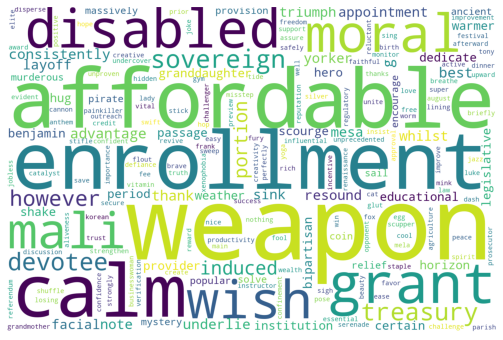

In [93]:
B_am3p,m_t_a3p,m_w_a3p = pgrank_projection(america3L, emo = "posemo", n_iteration = 20, plotWC= True )
m_w_a3_ordp =sorted(m_w_a3p.to_dict().items(), key=lambda item: item[1],reverse  = True)

In [94]:
m_w_a3_ordp[0:10]

[('weapon', 0.007383873093586323),
 ('affordable', 0.004764820530882116),
 ('enrollment', 0.004764820530882116),
 ('calm', 0.003937509540368532),
 ('grant', 0.0037887152151777023),
 ('disabled', 0.0034090078225161905),
 ('moral', 0.0032819974369591894),
 ('wish', 0.0032819974369591894),
 ('mali', 0.0029544415564589635),
 ('sovereign', 0.0029544415564589635)]

#### Out of context words analysis

In [95]:
with pd.option_context('display.max_colwidth', -1):
    display(america3L.loc[america3L['Source (B)'].str.contains("weapon", case=False)][['Source (B)']])
    display(america3L.loc[america3L['Source (B)'].str.contains(" affordable", case=False)][['Source (B)']])
    display(america3L.loc[america3L['Source (B)'].str.contains("enrollment", case=False)][['Source (B)']])
    display(america3L.loc[america3L['Source (B)'].str.contains("calm", case=False)][['Source (B)']])
    display(america3L.loc[america3L['Source (B)'].str.contains("grant", case=False)][['Source (B)']])
    display(america3L.loc[america3L['Source (B)'].str.contains("disabled", case=False)][['Source (B)']])
    display(america3L.loc[america3L['Source (B)'].str.contains("moral", case=False)][['Source (B)']])


Source (B)
11000  Amnesty denounces world leaders for weaponising the COVID-19 pandemic to ramp up their assault on basic rights ðŸ‘‡ https://t.co/J3TPIozNjo                                                                                              
11048  â€˜Weaponisedâ€™ COVID restrictions stifle Hong Kongâ€™s freedom https://t.co/jVcOBzA8nd https://t.co/9XB7b640dI                                                                                                                         
11049  â€˜Weaponisedâ€™ COVID restrictions stifle Hong Kongâ€™s freedom  https://t.co/JfIXoYNnhg                                                                                                                                                
12047   'The dark web is a part of the internet not detected by search engines where cybercriminals often sell and buy illicit materials, from credit card numbers and drugs to cyberweapons and now, apparently, coronavirus-related products. 
14016   "Mass vaccination is Brazil's best weapon against virus, economic challenges: Treasury secretary

Source (B)
12041   'The Affordable Care Act special enrollment period will be extended by three months to August 15, allowing Americans more time to take advantage of benefits granted through the Covid relief law

Source (B)
12041   'The Affordable Care Act special enrollment period will be extended by three months to August 15, allowing Americans more time to take advantage of benefits granted through the Covid relief law

Source (B)
11639  German Covid Easter U-turn shakes Merkel's cool, calm image https://t.co/YuGZ2x4ccR

Source (B)
10900   'Migrant workers pile into rail stations in Indiaâ€™s Mumbai to head back to their home villages after COVID curbs                                                                                                                                                        
10944  RT @AJEnglish: Human rights groups are warning many refugees and migrant workers are being left out of Lebanonâ€™s COVID vaccine programme. Tâ€¦                                                                                                                           
10949   'Human rights groups are warning many refugees and migrant workers are being left out of Lebanonâ€™s COVID vaccine programme. The rollout is in its third month.                                                                                                          
11328  RT @AP_Europe: Bosnian authorities worry about outbreaks of COVID-19 among the more than 6,000 refugees and other migrants living in camps.â€¦                                                                                                                             
11426   "Weekend reads: \nâ€¢ A migrant dad faces charges after losing his only child. \nâ€¢ NYC courthouses adapt to COVID as trials return.\nâ€¢ Confusion reigns over Biden policies amid border surge.\nâ€¢ Will work from home outlast the virus? Ford's move suggests yes.\n
11444  RT @AP_Europe: Community activists armed with language skills are reaching out in a Berlin immigrant neighborhood, hoping to raise awarenesâ€¦                                                                                                                             
11801   'The Biden administration is wrestling with a massive backlog of nearly 2.6 million immigrant visa applications, caused by restrictions from Trump policies and the Covid-19 pandemic.                                                                                    
12000   'More than 500 unaccompanied migrant children currently held in US government shelters have tested positive for Covid-19, federal officials said                                                                                                                          
12041   'The Affordable Care Act special enrollment period will be extended by three months to August 15, allowing Americans more time to take advantage of benefits granted through the Covid relief law                                                                         
12091   "Federal regulators said they won't extend a Covid relief provision granted to big banks, dashing Wall Street's hopes for an extension

Source (B)
11407  RT @AP_Politics: Advocates for the elderly and the disabled hope $12 billion in the COVID-19 relief law speeds the shift to care in everydaâ€¦

Source (B)
11881   'President Joe Biden and first lady Jill Biden shared well-wishes with Americans celebrating Easter and encouraged them to get Covid-19 vaccinations as a moral obligation 
13111  French consumer morale unexpectedly strong in March despite COVID-19 curbs https://t.co/TT5t6ij5UE https://t.co/mhXAXrlvsS

does not seem very positive emotions